In [1]:
import sys
import pandas as pd
import numpy as np
import spotipy
import spotipy.util as util
sp = spotipy.Spotify() 
from spotipy.oauth2 import SpotifyClientCredentials 
cid ='Enter your CLIENT_ID here'
secret ='Enter your CLIENT_SECRET here'
redirect_uri='http://localhost:8501/'

In [2]:
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret) 
#sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager) 
#sp.trace=False
scope = 'user-library-read playlist-read-private'

user_name = "dummy"

## 
token = util.prompt_for_user_token(user_name, scope,client_id=cid, client_secret=secret, redirect_uri=redirect_uri,show_dialog=True) 

# if token:
#     sp = spotipy.Spotify(auth=token)
#     results = sp.current_user_saved_tracks()
#     for item in results['items']:
#         track = item['track']
#         print(track['name'] + ' - ' + track['artists'][0]['name'])
# else:
#     print("Can't get token for", username)
    
if token:
    sp = spotipy.Spotify(auth=token)
    current_user = sp.current_user()
    username = current_user["display_name"]
    playlists = sp.user_playlists(username)
    playlist_uris = []
    playlist_labels = {}
    count=0
    for playlist in playlists['items']:
        pl_name = playlist['name']
        playlist_uris.append(playlist["id"])
        playlist_labels[pl_name] = count
        print("Playlist name: {}".format(pl_name))
        count+=1
else:
    print("Can't get token for", username)

Playlist name: Dance Hits
Playlist name: Rock Classics
Playlist name: Work From Home
Playlist name: Get Turnt
Playlist name: Deep Focus


In [3]:
playlist_labels

{'Dance Hits': 0,
 'Rock Classics': 1,
 'Work From Home': 2,
 'Get Turnt': 3,
 'Deep Focus': 4}

In [4]:
playlist_uris

['37i9dQZF1DX0BcQWzuB7ZO',
 '37i9dQZF1DWXRqgorJj26U',
 '37i9dQZF1DWTLSN7iG21yC',
 '37i9dQZF1DWY4xHQp97fN6',
 '37i9dQZF1DWZeKCadgRdKQ']

In [5]:
inv_map = {v: k for k, v in playlist_labels.items()}

In [6]:
def songs_database(playlist_uris):
    songs_df = pd.DataFrame()
    for uri in playlist_uris:
        playlist = sp.user_playlist("spotify",uri) 
        songs = playlist["tracks"]["items"] 
        ids = []
        song_names = []
        song_artist = []
        
        for i in range(len(songs)): 
            ids.append(songs[i]["track"]["id"])
            song_names.append(songs[i]["track"]["name"])
            song_artist.append(songs[i]["track"]["artists"][0]['name'])
        features = sp.audio_features(ids)
        df1 = pd.DataFrame()
        for each in features:
            if(each != None):
                d = pd.DataFrame(each,index=[0])
            df1 = df1.append(d,ignore_index=True)
        df2 = pd.DataFrame()
        df2["track_title"] = song_names
        df2["track_artist"] = song_artist
        df2["playlist_name"] = playlist["name"]
        df3 = pd.concat([df2,df1], axis=1)
        
        if songs_df.empty:
            songs_df = df3
        else:
            songs_df = pd.concat([songs_df,df3],axis=0,ignore_index=True)
    
    return songs_df

In [7]:
user_songs = songs_database(playlist_uris)

In [8]:
user_songs

,track_title,track_artist,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,My Feelings for You - Radio Edit,Avicii,Dance Hits,0.628,0.9800,6,-2.457,0,0.0548,0.0171,...,0.3660,0.3030,128.078,audio_features,6LhWs4teHcqwsRpzMVwsiK,spotify:track:6LhWs4teHcqwsRpzMVwsiK,https://api.spotify.com/v1/tracks/6LhWs4teHcqw...,https://api.spotify.com/v1/audio-analysis/6LhW...,159960,4
1,Nights Like This,Loud Luxury,Dance Hits,0.699,0.8610,3,-4.990,1,0.0543,0.0546,...,0.2760,0.4990,126.023,audio_features,5Mvqn0Gxj5LUb4um0r4Web,spotify:track:5Mvqn0Gxj5LUb4um0r4Web,https://api.spotify.com/v1/tracks/5Mvqn0Gxj5LU...,https://api.spotify.com/v1/audio-analysis/5Mvq...,173340,4
2,The Veldt - Radio Edit,deadmau5,Dance Hits,0.736,0.7590,9,-7.066,1,0.0347,0.0573,...,0.0778,0.4850,128.039,audio_features,29B5iOEsl6pMnvZke3rcIT,spotify:track:29B5iOEsl6pMnvZke3rcIT,https://api.spotify.com/v1/tracks/29B5iOEsl6pM...,https://api.spotify.com/v1/audio-analysis/29B5...,170067,4
3,Body Back (feat. Maia Wright),Gryffin,Dance Hits,0.686,0.8300,8,-4.437,1,0.0369,0.0948,...,0.1820,0.4860,123.032,audio_features,1z1XegUChLLQfcbtIK8ABn,spotify:track:1z1XegUChLLQfcbtIK8ABn,https://api.spotify.com/v1/tracks/1z1XegUChLLQ...,https://api.spotify.com/v1/audio-analysis/1z1X...,214634,4
4,Family - Frank Walker Remix,The Chainsmokers,Dance Hits,0.663,0.8460,8,-4.015,0,0.0801,0.1920,...,0.1730,0.5900,123.995,audio_features,6YnkswUQX2GXOhywMsBDqp,spotify:track:6YnkswUQX2GXOhywMsBDqp,https://api.spotify.com/v1/tracks/6YnkswUQX2GX...,https://api.spotify.com/v1/audio-analysis/6Ynk...,185813,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ultraviolet,Evan Michael Brown,Deep Focus,0.144,0.2470,4,-16.582,0,0.0380,0.6260,...,0.1530,0.0881,87.183,audio_features,5zaYPmW3fWxDcPrGQxPsZ2,spotify:track:5zaYPmW3fWxDcPrGQxPsZ2,https://api.spotify.com/v1/tracks/5zaYPmW3fWxD...,https://api.spotify.com/v1/audio-analysis/5zaY...,256000,4
496,Walking Away,Avery Young,Deep Focus,0.518,0.1160,0,-20.806,1,0.0387,0.9810,...,0.1140,0.3530,191.991,audio_features,07Nh0xvmo9b32APyAzbD2e,spotify:track:07Nh0xvmo9b32APyAzbD2e,https://api.spotify.com/v1/tracks/07Nh0xvmo9b3...,https://api.spotify.com/v1/audio-analysis/07Nh...,147025,4
497,Andromeda,ÆROSPHERE,Deep Focus,0.434,0.1000,9,-22.070,1,0.0287,0.9470,...,0.1060,0.0511,99.917,audio_features,2hjIqdLhL5qUtOA4HzMQeQ,spotify:track:2hjIqdLhL5qUtOA4HzMQeQ,https://api.spotify.com/v1/tracks/2hjIqdLhL5qU...,https://api.spotify.com/v1/audio-analysis/2hjI...,266400,4
498,Waves,Eucalyptic,Deep Focus,0.659,0.0266,0,-17.849,1,0.0715,0.9100,...,0.0865,0.2990,119.687,audio_features,4Ua4NrNeTgqMPB3cCdtuX5,spotify:track:4Ua4NrNeTgqMPB3cCdtuX5,https://api.spotify.com/v1/tracks/4Ua4NrNeTgqM...,https://api.spotify.com/v1/audio-analysis/4Ua4...,202344,4


In [9]:
user_songs["label_id"] = user_songs["playlist_name"].map(playlist_labels)

In [10]:
user_songs

,track_title,track_artist,playlist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,label_id
0,My Feelings for You - Radio Edit,Avicii,Dance Hits,0.628,0.9800,6,-2.457,0,0.0548,0.0171,...,0.3030,128.078,audio_features,6LhWs4teHcqwsRpzMVwsiK,spotify:track:6LhWs4teHcqwsRpzMVwsiK,https://api.spotify.com/v1/tracks/6LhWs4teHcqw...,https://api.spotify.com/v1/audio-analysis/6LhW...,159960,4,0
1,Nights Like This,Loud Luxury,Dance Hits,0.699,0.8610,3,-4.990,1,0.0543,0.0546,...,0.4990,126.023,audio_features,5Mvqn0Gxj5LUb4um0r4Web,spotify:track:5Mvqn0Gxj5LUb4um0r4Web,https://api.spotify.com/v1/tracks/5Mvqn0Gxj5LU...,https://api.spotify.com/v1/audio-analysis/5Mvq...,173340,4,0
2,The Veldt - Radio Edit,deadmau5,Dance Hits,0.736,0.7590,9,-7.066,1,0.0347,0.0573,...,0.4850,128.039,audio_features,29B5iOEsl6pMnvZke3rcIT,spotify:track:29B5iOEsl6pMnvZke3rcIT,https://api.spotify.com/v1/tracks/29B5iOEsl6pM...,https://api.spotify.com/v1/audio-analysis/29B5...,170067,4,0
3,Body Back (feat. Maia Wright),Gryffin,Dance Hits,0.686,0.8300,8,-4.437,1,0.0369,0.0948,...,0.4860,123.032,audio_features,1z1XegUChLLQfcbtIK8ABn,spotify:track:1z1XegUChLLQfcbtIK8ABn,https://api.spotify.com/v1/tracks/1z1XegUChLLQ...,https://api.spotify.com/v1/audio-analysis/1z1X...,214634,4,0
4,Family - Frank Walker Remix,The Chainsmokers,Dance Hits,0.663,0.8460,8,-4.015,0,0.0801,0.1920,...,0.5900,123.995,audio_features,6YnkswUQX2GXOhywMsBDqp,spotify:track:6YnkswUQX2GXOhywMsBDqp,https://api.spotify.com/v1/tracks/6YnkswUQX2GX...,https://api.spotify.com/v1/audio-analysis/6Ynk...,185813,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Ultraviolet,Evan Michael Brown,Deep Focus,0.144,0.2470,4,-16.582,0,0.0380,0.6260,...,0.0881,87.183,audio_features,5zaYPmW3fWxDcPrGQxPsZ2,spotify:track:5zaYPmW3fWxDcPrGQxPsZ2,https://api.spotify.com/v1/tracks/5zaYPmW3fWxD...,https://api.spotify.com/v1/audio-analysis/5zaY...,256000,4,4
496,Walking Away,Avery Young,Deep Focus,0.518,0.1160,0,-20.806,1,0.0387,0.9810,...,0.3530,191.991,audio_features,07Nh0xvmo9b32APyAzbD2e,spotify:track:07Nh0xvmo9b32APyAzbD2e,https://api.spotify.com/v1/tracks/07Nh0xvmo9b3...,https://api.spotify.com/v1/audio-analysis/07Nh...,147025,4,4
497,Andromeda,ÆROSPHERE,Deep Focus,0.434,0.1000,9,-22.070,1,0.0287,0.9470,...,0.0511,99.917,audio_features,2hjIqdLhL5qUtOA4HzMQeQ,spotify:track:2hjIqdLhL5qUtOA4HzMQeQ,https://api.spotify.com/v1/tracks/2hjIqdLhL5qU...,https://api.spotify.com/v1/audio-analysis/2hjI...,266400,4,4
498,Waves,Eucalyptic,Deep Focus,0.659,0.0266,0,-17.849,1,0.0715,0.9100,...,0.2990,119.687,audio_features,4Ua4NrNeTgqMPB3cCdtuX5,spotify:track:4Ua4NrNeTgqMPB3cCdtuX5,https://api.spotify.com/v1/tracks/4Ua4NrNeTgqM...,https://api.spotify.com/v1/audio-analysis/4Ua4...,202344,4,4


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn import metrics

In [12]:
## Modified K-Means ##
def cluster_centroids(X):
    return((X.mean()))

playlist_clusters = {}
features = user_songs.sample(frac=1).reset_index(drop=True)
train_cols = ['danceability','energy', 'key', 'loudness', 'speechiness', 'acousticness',
              'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
target_cols = "label_id"
result_cols = ["track_title","track_artist"]
target = features[target_cols]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=1)
y_test = y_test.reset_index(drop=True)

for each in playlist_labels:
    temp = pd.DataFrame()
    temp = X_train[X_train["playlist_name"] == each]
    temp2 = pd.DataFrame(scaler.fit_transform(temp[train_cols]))
    playlist_clusters[each] = cluster_centroids(temp2)

playlist_clusters = pd.DataFrame.from_dict(playlist_clusters, orient='index')
playlist_clusters

,0,1,2,3,4,5,6,7,8,9,10
Dance Hits,0.564465,0.647649,0.503030,0.624087,0.119611,0.165524,0.094264,0.254481,0.472782,0.506649,0.229074
Rock Classics,0.433653,0.610525,0.477593,0.659414,0.111838,0.236627,0.103984,0.215102,0.584585,0.487663,0.330970
Work From Home,0.494796,0.572762,0.393939,0.614340,0.122283,0.278985,0.014536,0.152772,0.471228,0.251755,0.420844
Get Turnt,0.717051,0.544653,0.491627,0.766252,0.476316,0.189556,0.013637,0.226482,0.490552,0.528765,0.505811
Deep Focus,0.577390,0.414707,0.440000,0.573107,0.242797,0.785355,0.806231,0.267778,0.247634,0.447068,0.327293


In [13]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test[train_cols]))
X_test_scaled

,0,1,2,3,4,5,6,7,8,9,10
0,0.593403,0.825520,0.454545,0.545227,0.011327,0.021971,0.001113,0.101358,0.849073,0.530165,0.254603
1,0.792693,0.740383,0.636364,0.804046,0.034474,0.001577,0.664916,0.251567,0.646399,0.445492,0.180490
2,0.536136,0.698339,0.363636,0.474910,0.024624,0.015022,0.110294,0.156217,0.680897,0.539988,0.365351
3,0.617455,0.778222,0.454545,0.877146,0.054174,0.005474,0.000000,0.160136,0.219491,0.452485,0.102476
4,0.857977,0.696237,0.636364,0.742549,0.014036,0.327234,0.040336,0.073668,0.881414,0.451548,0.248535
...,...,...,...,...,...,...,...,...,...,...,...
120,0.534990,0.298928,0.090909,0.623797,0.004679,0.823751,0.000017,0.107889,0.227038,0.609016,0.361790
121,0.323102,0.991591,0.636364,0.886908,0.633095,0.001617,0.001712,0.434431,0.235662,0.820149,0.418743
122,0.664414,0.000000,0.000000,0.272307,0.109825,0.916408,0.058088,0.081113,0.284174,0.423149,0.213756
123,0.954186,0.398781,0.090909,0.699019,0.423787,0.155014,0.006891,0.109195,0.072876,0.291644,0.050954


In [14]:
def distances(X):
    X = np.array(X)
    df = pd.DataFrame(index=playlist_clusters.index.copy())
    for index,each in playlist_clusters.iterrows():
        Y = np.array(each)
        distance = np.linalg.norm(X - Y)
        df.loc[index,"distance"] = distance 
    return (df.idxmin(axis = 0)[0])

predictions = []

for index,song in X_test_scaled.iterrows():
    predictions.append(distances(song))
    
predictions = pd.Series(predictions)
predictions = predictions.rename("assigned_playlist")
y_pred = predictions.map(playlist_labels)
print(predictions)

0       Rock Classics
1          Dance Hits
2       Rock Classics
3          Dance Hits
4       Rock Classics
            ...      
120    Work From Home
121         Get Turnt
122        Deep Focus
123         Get Turnt
124        Deep Focus
Name: assigned_playlist, Length: 125, dtype: object


In [15]:
count=0
for i in range(len(y_pred)):
    if(y_pred[i] == y_test[i]):
        count+=1
acc = count/len(y_pred)
print("Accuracy: ",acc)

Accuracy:  0.648


In [16]:
X_final = X_test[result_cols]
X_final = X_final.reset_index(drop=True)
songs_result = pd.concat([X_final,predictions],axis=1,)
songs_result

,track_title,track_artist,assigned_playlist
0,Go Your Own Way,Fleetwood Mac,Rock Classics
1,On My Mind,Diplo,Dance Hits
2,Barracuda,Heart,Rock Classics
3,Where Have You Gone (Anywhere),Lucas & Steve,Dance Hits
4,New Light,John Mayer,Rock Classics
...,...,...,...
120,Let It Go,James Bay,Work From Home
121,Kickstart My Heart,Mötley Crüe,Get Turnt
122,Waves,Eucalyptic,Deep Focus
123,Don't Be Mad At Me,Problem,Get Turnt


In [20]:
playlist_clusters.columns = train_cols
polarplot = playlist_clusters.to_dict("index")
len(polarplot)

5

[0.5644654088050314, 0.6476485788113696, 0.5030303030303029, 0.6240873506386486, 0.11961080586080584, 0.16552420691767938, 0.09426354560236513, 0.2544812648906216, 0.47278167594160797, 0.5066492294072674, 0.22907390397932773]
[0.4336534357661117, 0.6105245481832877, 0.4775928297055057, 0.6594140685341627, 0.11183773698286642, 0.2366274395897916, 0.10398431019854065, 0.2151020642665481, 0.5845851930324242, 0.4876628318665975, 0.33096961060480523]
[0.49479625666205024, 0.5727617226236009, 0.39393939393939403, 0.6143403682613218, 0.12228323038206351, 0.2789849836707227, 0.014536398824105828, 0.1527719231449124, 0.47122836774621507, 0.2517551227551304, 0.42084389483517415]
[0.7170511154429285, 0.544653090011461, 0.4916267942583734, 0.7662523647503953, 0.47631644344459556, 0.18955559628105814, 0.0136368929877564, 0.2264818554094092, 0.49055246812683895, 0.5287653222628194, 0.5058112027912351]
[0.5773901284651791, 0.414707413939983, 0.4400000000000001, 0.5731067545350298, 0.24279745685740234

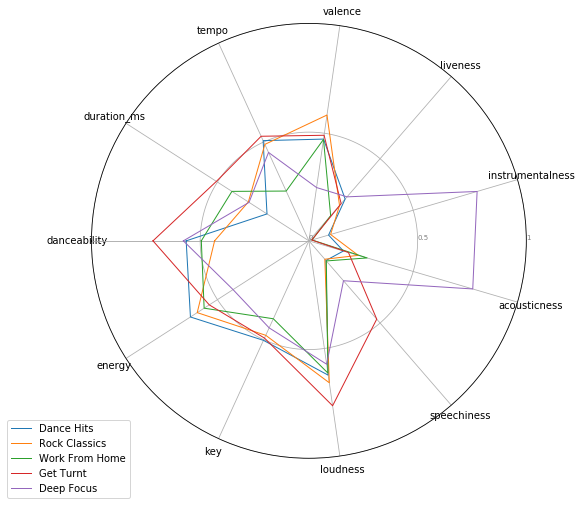

In [25]:
# from math import pi
import matplotlib.pyplot as plt
%matplotlib inline

N = len(train_cols)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig = plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(pi)
ax.set_theta_direction(1)

#ax.spines["polar"].set_visible(False)

plt.xticks(angles, train_cols)

ax.set_rlabel_position(-180)
plt.yticks([0, 0.5, 1], ["0", "0.5","1"], color="grey", size=7)
plt.ylim(0, 1)

# Ind1
for i, key in enumerate(polarplot.keys()):
    if i <len(polarplot):
        values=list(playlist_clusters.iloc[i])
        print(values)
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=key)
 
# Add legend
plt.legend(bbox_to_anchor=(0.1, 0.1))
plt.show()
fig.savefig("Party vs Focus.png",dpi=300)

In [19]:
# Removing access token once all operations are completed and user is required to login again

import os
filename = ".cache-%s" % user_name
#print(filename)
if os.path.exists(filename):
    os.remove(filename)
    #print("file removed")
else:
    print("The file does not exist")